In [1]:
import tensorflow as tf
from utils import load_img, imshow, tensor_to_image
import matplotlib.pyplot as plt
from gatys import run_styler

In [2]:
#content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
content_path = tf.keras.utils.get_file('dog.jpg', 'file://localhost/tf/images/dog.jpg')

# https://commons.wikimedia.org/wiki/File:Vassily_Kandinsky,_1913_-_Composition_7.jpg
#style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')
style_path = tf.keras.utils.get_file('abstract.jpg', 'file://localhost/tf/images/abstract.jpg')

16384/12555 [=======================================] - 0s 0us/step


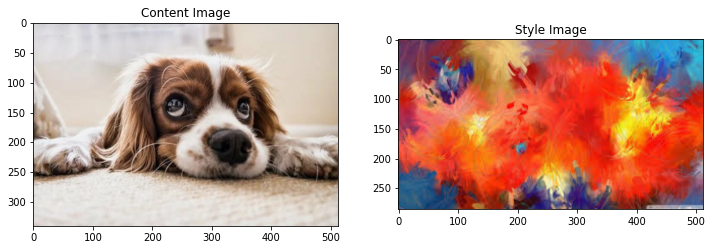

In [3]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

In [4]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

80142336/80134624 [==============================] - 9s 0us/step


In [5]:
image = run_styler(vgg, style_image, content_image, iterations=0, style_weight=1e-2, content_weight=1e4, total_variation_weight=1e2)

Layers:
input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool
num_content_layers:  1
num_style_layers:  5
outputs:  [<tf.Tensor 'block1_conv1/Identity:0' shape=(None, None, None, 64) dtype=float32>, <tf.Tensor 'block2_conv1/Identity:0' shape=(None, None, None, 128) dtype=float32>, <tf.Tensor 'block3_conv1/Identity:0' shape=(None, None, None, 256) dtype=float32>, <tf.Tensor 'block4_conv1/Identity:0' shape=(None, None, None, 512) dtype=float32>, <tf.Tensor 'block5_conv1/Identity:0' shape=(None, None, None, 512) dtype=float32>]
model built
style_extractor layers found
style_outputs created
vgg created
vgg marked not trainable
outputs:  [<tf.Tensor 'block1_conv1_1/Identity:0' shape=(None, None, None, 64) dtype=float32>, <tf.Tensor 'block2_conv1_1/Identity:0' shape=(None, 

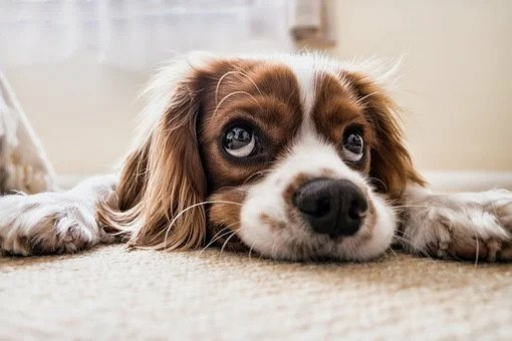

In [6]:
tensor_to_image(image)

In [11]:
print(image.numpy())

[[[[0.8352942  0.8352942  0.8431373 ]
   [0.8352942  0.8352942  0.8431373 ]
   [0.8352942  0.8352942  0.8431373 ]
   ...
   [0.80392164 0.7686275  0.70980394]
   [0.80392164 0.7686275  0.70980394]
   [0.80392164 0.7686275  0.70980394]]

  [[0.8352942  0.8352942  0.8431373 ]
   [0.8352942  0.8352942  0.8431373 ]
   [0.8352942  0.8352942  0.8431373 ]
   ...
   [0.80392164 0.7686275  0.70980394]
   [0.80392164 0.7686275  0.70980394]
   [0.80392164 0.7686275  0.70980394]]

  [[0.8352942  0.8352942  0.8431373 ]
   [0.8352942  0.8352942  0.8431373 ]
   [0.8352942  0.8352942  0.8431373 ]
   ...
   [0.80392164 0.7686275  0.70980394]
   [0.80392164 0.7686275  0.70980394]
   [0.80392164 0.7686275  0.70980394]]

  ...

  [[0.82736486 0.79207075 0.7724629 ]
   [0.82736486 0.79207075 0.7724629 ]
   [0.82736486 0.79207075 0.7724629 ]
   ...
   [0.85085624 0.82340527 0.7841896 ]
   [0.8469784  0.81952745 0.78031176]
   [0.84307986 0.8156289  0.7764132 ]]

  [[0.8157036  0.78040946 0.7608016 ]
   [0.8

In [15]:
import numpy as np
np.squeeze(image.numpy()).shape

(341, 512, 3)